# Task #1: Prediction using Supervised ML

---

# Aim: Predict the percentage of an student based on the no. of study hours





### Import libraries

In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics

### Read data using pandas

In [2]:
# Loading the data from the link
data_url = "http://bit.ly/w-data"
df = pd.read_csv(data_url)
print("Data is successfully imported")
df.head()

Data is successfully imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Data Wrangling

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


There is no missing values

In [4]:
df.shape

(25, 2)

The dataset contains 25 rows and 2 columns

In [5]:
df.duplicated().sum()

0

There are no duplicted rows

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Visualization

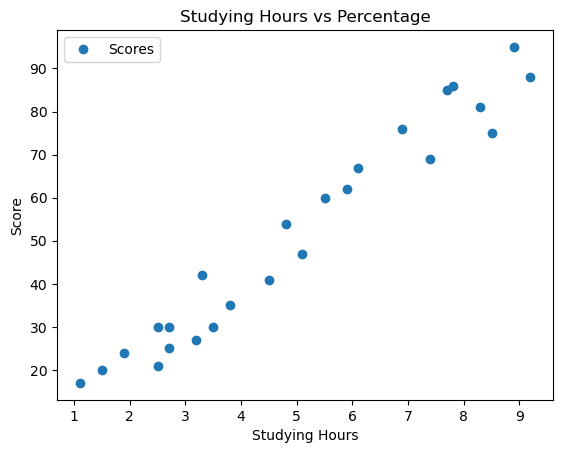

In [7]:
df.plot(x= 'Hours', y= 'Scores',style='o')  
plt.title('Studying Hours vs Percentage')  
plt.xlabel('Studying Hours')  
plt.ylabel('Score')
plt.show();

The graph shows that there is positive correlation between scores and studying hours

### Preparing the data

In [8]:
# Dividing data into attributes and labels
X = df.iloc[:, :-1].values
Y = df.iloc[:, 1].values

In [9]:
# Displaying the 1st 3 attributes
X[:3]

array([[2.5],
       [5.1],
       [3.2]])

In [10]:
# Displaying the 1st 3 labels
Y[:3]

array([21, 47, 27], dtype=int64)

In [11]:
# splitting data into training set and testing set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 0, shuffle= True)

### Training the model

In [12]:
# Using Linear Regression Model
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 
print("Training is finished.")

Training is finished.


### Visualization using linear regression

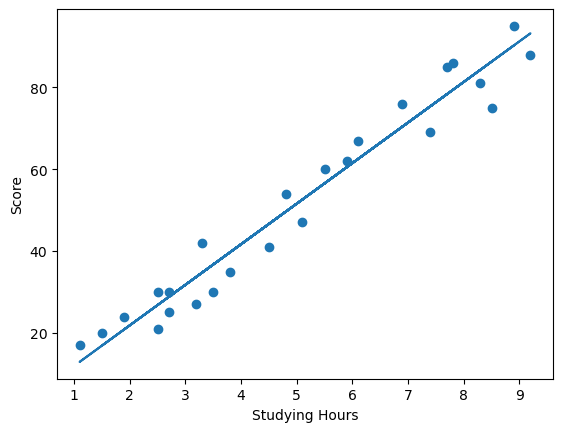

In [13]:
# Plotting regression line
line = regressor.coef_*X+regressor.intercept_
# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line)
plt.xlabel('Studying Hours')  
plt.ylabel('Score')
plt.show();

### Model Prediction

In [14]:
Y_pred = regressor.predict(X_test)

### Comparison between the actual results to the predicted model results

In [15]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': Y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Model Evaluation

In [16]:
# mean_squared_error
print('Mean Square Error:',  metrics.mean_squared_error(Y_test, Y_pred)) 
# mean_absolute_error 
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred))
# R-2
print('R-2:', metrics.r2_score(Y_test, Y_pred))

Mean Square Error: 21.5987693072174
Mean Absolute Error: 4.183859899002975
R-2: 0.9454906892105356


### Visualizing difference between the actual and predicted value

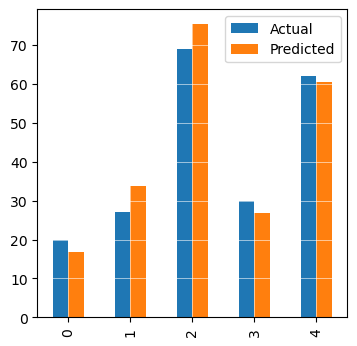

In [17]:
df.plot(kind= 'bar',figsize= (4,4))
plt.grid(which= 'major', linewidth= '0.4', color= 'white')
plt.grid(which= 'minor', linewidth= '0.4', color= 'blue')
plt.show();

### Accuracy of the model

In [18]:
# Estimating training and testing scores ro get the accuracy
print("Training Score:",regressor.score(X_train,Y_train))
print("Test Score:",regressor.score(X_test,Y_test))

Training Score: 0.9515510725211552
Test Score: 0.9454906892105356


### The predicted score of a student studying 9.25 hrs/day

In [19]:
# Testing the model with our own data
no_of_hours = 9.25
hours = np.array([no_of_hours])
hours = hours.reshape(-1, 1)
pred = regressor.predict(hours)
print("No. of Hours = {} hours".format(hours[0][0]))
print("The Predicted Score = {} % rounded to = {} %".format(pred[0],pred[0].round()))

No. of Hours = 9.25 hours
The Predicted Score = 93.69173248737538 % rounded to = 94.0 %
